- title: Занятие 13
- author: Vitalii Zavadskyi
- date: 2024-11-23
- slug: 2024_lpr_lab13
- ipynb_url: download/2024_lpr_lab13.ipynb

# Лабораторное занятие 13

 В этой лабораторной работе мы познакомимся с инструментами scikit-learn для решения задач регрессии. На этом семинаре мы познакомимся с моделями для обучения с учителем: `LinearRegression`, `DecisionTreeRegressor` и `LogisticRegression`

## Задача одномерной линейной регрессии

Начнем с простой задачи предсказания целевого показателя (таргета) по одному признаку. Если связь между таргетом и нецелевым признаком линейная, то подходящим вариантом может оказаться одномерная линейная регрессия.

В одномерной линейной регрессии прогнозируемое значение определяется как:
$$y(x) = k \cdot x + b$$

где $k, b$ - подбираемые в ходе обучения модели коэффициенты.

От одномерной линейной регресси можно перейти к матричной записи добавив признак равный 1 при свободном коэффициенте.

## Задача двумерной линейной регрессии

Пускай есть набор из $y_{i}, i = \overline{1, N}$, который характеризуется набором признаков $x_{i}, i = \overline{1, N}$. Набор признаков можно представить в виде таблицы с размерами $N \times 2$. Такую таблицу обозначим через $X$:
$$ X =
\begin{pmatrix}
    1 & x_1 \\
    1 & x_2 \\
    \dots \\
    1 & x_N \\
\end{pmatrix}
$$
Каждому признаку можно сопоставить целевое значение $y_i, i = \overline{1, N}$. Тогда можно задаться целью решить следующую систему уравнений:
$$X w = y,$$
где `w` — вектор параметров модели с $2$ значениями. Если же явно расписать матричное уравнение, то получим
$$
\begin{cases}
  1 w_0 + x_1 w_1 = y_1 \\
  1 w_0 + x_2 w_1 = y_1 \\
  \dots \\
  1 w_0 + x_N w_1 = y_N \\
\end{cases}
$$
Получается система линейных уравнений. Данная система уравнений может **не иметь** точного решения. Соотвественно, мы хотим подобрать параметры $w_0, w_1$ таким образом, чтобы оказаться как можно ближе к целевым значениям $y$. Задачу можно переформулировать: провести прямую $y = w_0 + w_1 x$, которая лучше всего проходит через набор точек $(x_i, y_i), i = \overline{1, N}$. Соотвествующую задачу мы можем решить с помощью метода наименьших квадратов (МНК). Математически МНК записывется как
$$ Xw - y \rightarrow \min.$$
Сам по себе МНК минимизирует следующую функцию потерь (loss function)
$$ \mathrm{MSE} = \min\limits_{w} \frac{1}{N}\left(a(x) - y_i\right)^2 = \min\limits_{w} \frac{1}{N}\left((w_1 x_i + w_0) - y_i\right)^2. $$
Решения для параметров $w_0$ и $w_1$ известны. Их можно прямо посчитать с использованием производных
$$ w_1 = \frac{\sum\limits_{i = 1}^{N} x_i (N y_i - \sum\limits_{i = 1}^{N} y_i)}{\sum\limits_{i = 1}^{N} x_i (N x_i - \sum\limits_{i = 1}^{N} x_i)} $$
$$ w_0 = \frac{1}{N} \sum\limits_{i = 1}^{N} y_i - w_1 \frac{1}{N} \sum\limits_{i = 1}^{N} x_i $$

## Данные про алмазы

Воспользуемся общедоступным набором данных про алмазы для построения линейных моделей.

Для этого загрузим данные с помощью библиотеки `seaborn`

In [1]:
import seaborn as sns

print(f"Version of seaborn: {sns.__version__}")

df = sns.load_dataset("diamonds")
df

Version of seaborn: 0.13.2


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


В наборе данных присутствует следующая информация:
- `carat`: масса в каратах
- `cut`: тип граненки
- `color`: цвет
- `clarity`: прозрачность
- `depth`: некоторый линейный размер, %
- `table`: некоторый линейный размер, %
- `price`: цена, $
- `x`: некоторый линейный размер, мм
- `y`: некоторый линейный размер, мм
- `z`: некоторый линейный размер, мм

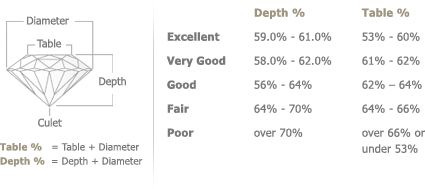

Попробуем оценить цену `price` алмаза по его "объему" двумя разными способами:
1. Посчитав коэффициенты $w_0$ и $w_1$ по известным формулам
2. Реализовав градиентный спуск

### Подготовка данных

**Упражнение 1**. Выделите отдельно данные о цене в переменную `y` и отдельно вычислите "объем" алмаза $x \times y \times z$ мм$^3$ в переменную `x`

In [2]:
x = df["x"] * df["y"] * df["z"]
y = df["price"]

Теперь графически отобразим зависимость цены алмаза от объема

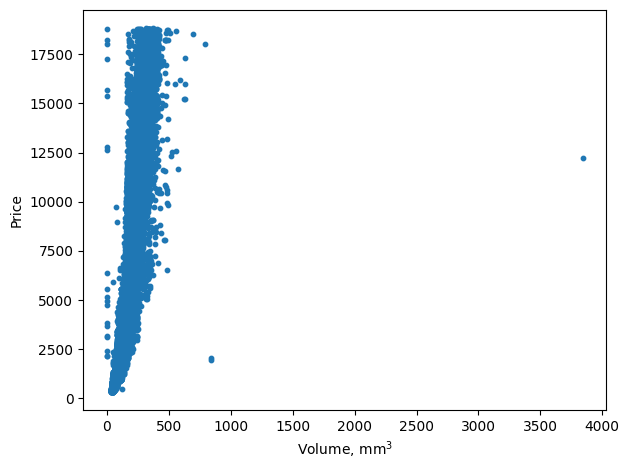

In [3]:
from matplotlib import pyplot as plt

plt.scatter(x, y, s=10)
plt.xlabel(r"Volume, mm$^3$")
plt.ylabel("Price")
plt.tight_layout()

В данных наблюдаются выбросы, которые могут значительно ухудшить нашу оценку, но пока эти выбросы мы не будем обрабатывать

**Упражнение 2**. Теперь подсчитает коэффициенты $w_0$ и $w_1$ по ранее определенным формулам

In [4]:
from sklearn.metrics import mean_squared_error
N = len(x)

w_1 = (x * (N * y - y.sum())).sum() / (x * (N * x - x.sum())).sum()
w_0 = (y.sum() - w_1 * x.sum()) / N

precise_w = (w_0, w_1)
print(f"Best fit values: w_0 = {w_0:1.3f}, w_1 = {w_1:1.3f}")

Best fit values: w_0 = -2041.479, w_1 = 46.009


Добавим нашу прямую на предыдущий график

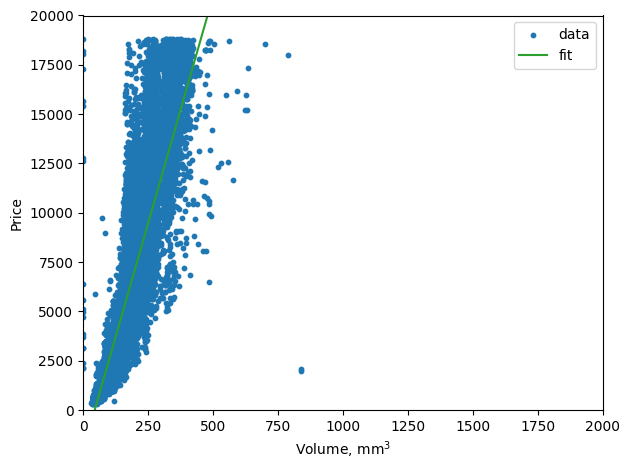

In [5]:
import numpy as np

x_plot = np.array([20, 500])

plt.scatter(x, y, s=10, label="data")
plt.plot(x_plot, w_0 + w_1 * x_plot, label="fit", color="C2")
plt.xlabel(r"Volume, mm$^3$")
plt.ylabel("Price")
plt.legend()
plt.xlim((0, 2e+3))
plt.ylim((0, 2e+4))
plt.tight_layout()

По виду данных создается впечатление, что наклон мог бы быть еще круче. Скорее всего наша модель сильно отклонилась из-за аномального выброса для объема > 3500 мм$^3$ (выброс хорошо виден на предыдущем графике)

Теперь же попробуем реализовать градиентный спуск.

## Градиентный спуск

Ранее была введена функция потерь MSE. Подбором параметров в нашей линейной модели мы пытаемся минимизировать значение MSE. Попробуем выписать производную MSE по параметрам $w$
$$
\mathrm{MSE}' = \nabla_w \mathrm{MSE} =
\begin{pmatrix}
\dfrac{d \mathrm{MSE}}{d w_0} \\
\dfrac{d \mathrm{MSE}}{d w_1}
\end{pmatrix} = 
\begin{pmatrix}
\dfrac{2}{N}\left((w_1 x_i + w_0) - y_i\right) \\
\dfrac{2 x_i}{N}\left((w_1 x_i + w_0) - y_i\right)
\end{pmatrix}
$$
Получили вектор, который состоит из производных по параметрам. Если подставить численные значения параметров $w$, то получим соответствующее значение производной в точке. Если же мы хотим минимизировать MSE, то нам нужно найти такие значения $w$, что каждая производная будет зануляться. Этого можно добиться при условии
$$
w = w - \gamma \nabla_w\mathrm{MSE} \rightarrow
\begin{pmatrix}
w_0 \\
w_1
\end{pmatrix} =
\begin{pmatrix}
w_0 \\
w_1
\end{pmatrix} - 
\gamma
\begin{pmatrix}
\dfrac{d \mathrm{MSE}}{d w_0} \\
\dfrac{d \mathrm{MSE}}{d w_1}
\end{pmatrix},
$$
где $\gamma$ является параметром скорости обучения и подбирается эмперически.

**Упражнение 3**. Попробуем реализовать градиентный спуск для линейной модели

In [6]:
w_0 = -2000
w_1 = 30
gamma = 1e-5
derivative_step = 1e-3
n_iterations = 100
N = len(x)

loss_function = lambda x, y, w_0, w_1: ((x * w_1 + w_0 - y)**2).sum() / len(x)

loss_values = []

for i in range(n_iterations):
    grad1 = 2 / N * (x*(w_1*x + w_0 - y)).sum()
    grad0 = 2 / N * (w_1*x + w_0 - y).sum()
    w_0 -= derivative_step * grad0
    w_1 -= gamma * grad1
    loss_values.append(loss_function(x, y, w_0, w_1))

approx_w = (w_0, w_1)
print(f"Gradient fit values: w_0 = {w_0:1.3f}, w_1 = {w_1:1.3f}")

Gradient fit values: w_0 = -1993.712, w_1 = 45.739


Построим график зависимости значения функции потерь от номера итерации

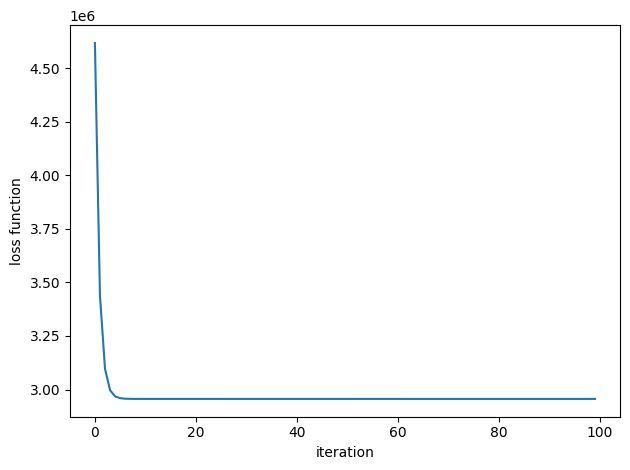

In [7]:
plt.plot(loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function")
plt.tight_layout()

Сравним результаты работы полноценного решения и решения с помощью градиентного спуска

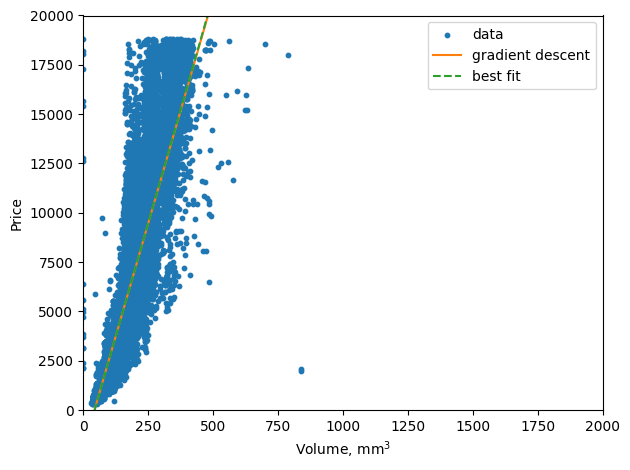

In [8]:
plt.scatter(x, y, s=10, label="data")
plt.plot(x_plot, approx_w[0] + approx_w[1] * x_plot, label="gradient descent", color="C1")
plt.plot(x_plot, precise_w[0] + precise_w[1] * x_plot, label="best fit", color="C2", linestyle="--")
plt.xlabel(r"Volume, mm$^3$")
plt.ylabel("Price")
plt.legend()
plt.xlim((0, 2e+3))
plt.ylim((0, 2e+4))
plt.tight_layout()

Прямые накладываются друг на друга. Приближенный метод градиентного спуска дает схожий ответ с честным решением МНК.

Начальные значения параметров специально были взяты близкими к истинным значениям, которые минимизируют MSE. Это позволяет простой реализации гадиентного спуска быстрее найти правильное решение.

**Упражнение 4**. Попробуйте взять другие начальные значения для параметров из **упражнения 3** и повторите градиентный спуск с тем же количеством итераций. Сравните полученный результат с **упражнением 3**

Gradient fit values with bad starting data: w_02 = -1515.744, w_12 = 43.036


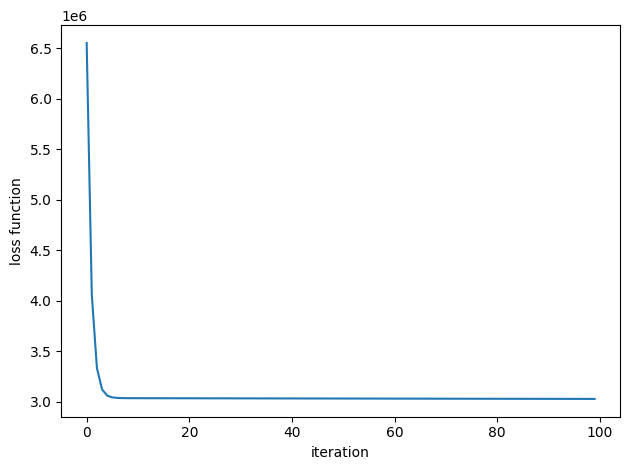

In [9]:
w_02 = -1500
w_12 = 20

loss_values = []

for i in range(n_iterations):
    grad1 = 2 / N * (x*(w_12*x + w_02 - y)).sum()
    grad0 = 2 / N * (w_12*x + w_02 - y).sum()
    w_02 -= derivative_step * grad0
    w_12 -= gamma * grad1
    loss_values.append(loss_function(x, y, w_02, w_12))

approx_w2 = (w_02, w_12)
print(f"Gradient fit values with bad starting data: w_02 = {w_02:1.3f}, w_12 = {w_12:1.3f}") #
plt.plot(loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function")
plt.tight_layout()

## Модель линейной регрессии в sklearn

Как было указано ранее, пакет `scikit-learn` содержит большое количество реализаций различных методов машинного обучения.

Попробуем решить задачу о цене алмаза по его объему с помощью модели из пакета `scikit-learn`

In [10]:
from sklearn.linear_model import LinearRegression

model_l = LinearRegression()

У класса `LinearRegression` есть параметр `fit_intercept: bool`. Он позваляет включить или исключить из подгонки свободный параметр (в предыдущих терминах это будет параметр $w_0$)

В предыдущей ячейке мы создали модель. Теперь же попробуем ее обучить на полном наборе данных. Для этого воспользуемся методом `.fit()` нашей модели

In [11]:
X_l = x.copy()
X_l = X_l.to_numpy().reshape((-1, 1))  # Метод fit(...) принимает только 2d массивы признаков

model_l.fit(X_l, y)
model_w = (model_l.intercept_, *model_l.coef_)

print(f"Model fit values: w_0 = {model_w[0]:1.3f}, w_1 = {model_w[1]:1.3f}")

Model fit values: w_0 = -2041.479, w_1 = 46.009


Сравним результаты работы полноценного решения, решения с помощью градиентного спуска и решения с помощью `LinearRegression`

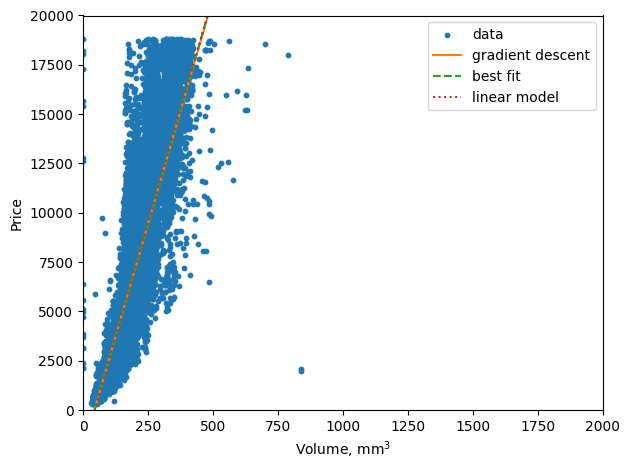

In [12]:
plt.scatter(x, y, s=10, label="data")
plt.plot(x_plot, approx_w[0] + approx_w[1] * x_plot, label="gradient descent", color="C1")
plt.plot(x_plot, precise_w[0] + precise_w[1] * x_plot, label="best fit", color="C2", linestyle="--")
plt.plot(x_plot, model_w[0] + model_w[1] * x_plot, label="linear model", color="C3", linestyle=":")
plt.xlabel(r"Volume, mm$^3$")
plt.ylabel("Price")
plt.legend()
plt.xlim((0, 2e+3))
plt.ylim((0, 2e+4))
plt.tight_layout()

Получили идеальное совпадение между формульными коэффициентами и подгонкой с помощью `LinearRegression`.

По форме распределения данных можно сказать, что мы имеем дело с "квадратичной" зависимостью. Давайте же попробуем подогнать с помощью квадратичной модели

In [13]:
X_q = np.stack((x, x**2), axis=1)

model_q = LinearRegression()

model_q.fit(X_q, y)

model_q_w = (model_q.intercept_, *model_q.coef_)

print(f"Model fit values: w_0 = {model_q_w[0]:1.3f}, w_1 = {model_q_w[1]:1.3f}, w_2 = {model_q_w[2]:1.3f}")

Model fit values: w_0 = -2541.626, w_1 = 51.988, w_2 = -0.012


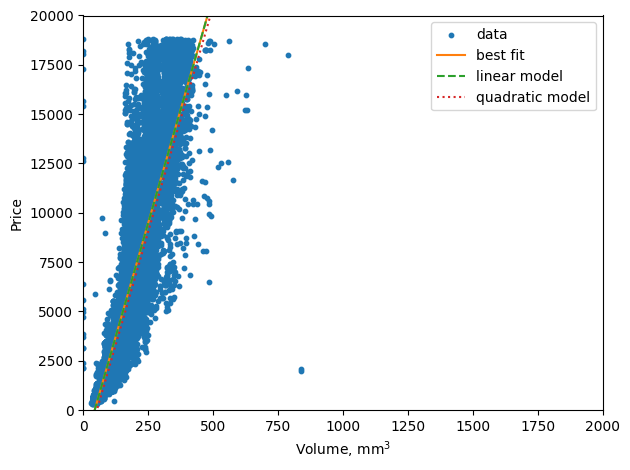

In [14]:
plt.scatter(x, y, s=10, label="data")
plt.plot(x_plot, precise_w[0] + precise_w[1] * x_plot, label="best fit", color="C1", linestyle="-")
plt.plot(x_plot, model_w[0] + model_w[1] * x_plot, label="linear model", color="C2", linestyle="--")
plt.plot(x_plot, model_q_w[0] + model_q_w[1] * x_plot + model_q_w[2] * x_plot**2, label="quadratic model", color="C3", linestyle=":")
plt.xlabel(r"Volume, mm$^3$")
plt.ylabel("Price")
plt.legend()
plt.xlim((0, 2e+3))
plt.ylim((0, 2e+4))
plt.tight_layout()

Квадратичная модель незначительно отклоняется от линейной. Как же сравнить степень незначительности?

Для ответа на этот вопрос мы можем посчитать значение MSE для линейной и квадратичной моделей

In [15]:
from sklearn.metrics import mean_squared_error

mse_l = mean_squared_error(y, model_l.predict(X_l))
mse_q = mean_squared_error(y, model_q.predict(X_q))

print(
    f"Linear approximation MSE: {mse_l:1.3f}\n"
    f"Quadratic approximation MSE: {mse_q:1.3f}"
)

Linear approximation MSE: 2955511.787
Quadratic approximation MSE: 2481050.863


Квадратичная модель дает меньшее значение. Если продолжать увеличивать степень многочлена, то значение MSE будет уменьшаться, но это может быть опасно **переобучением**.

**Упражнение 5**. Попробуйте в ячейке ниже написать модель для многочлена 5ой степени и посчитать для нее MSE

Gradient fit values with bad starting data: w_02 = -1515.744, w_12 = 43.036


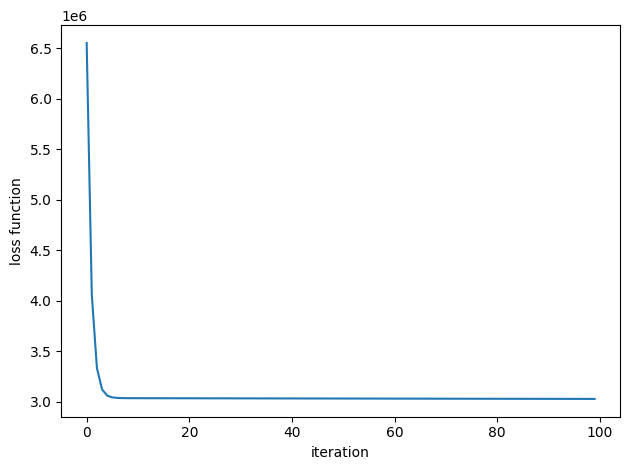

In [16]:
w_02 = -1500
w_12 = 20

loss_values = []

for i in range(n_iterations):
    grad1 = 2 / N * (x*(w_12*x + w_02 - y)).sum()
    grad0 = 2 / N * (w_12*x + w_02 - y).sum()
    w_02 -= derivative_step * grad0
    w_12 -= gamma * grad1
    loss_values.append(loss_function(x, y, w_02, w_12))

approx_w2 = (w_02, w_12)
print(f"Gradient fit values with bad starting data: w_02 = {w_02:1.3f}, w_12 = {w_12:1.3f}") #
plt.plot(loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function")
plt.tight_layout()

Теперь обобщим задачу о поиске наилучшей прямой на случай множественного количества параметров

## Задача многомерной линейной регрессии

Пускай есть набор из $N$ данных, который характеризуется некоторой "строкой" признаков $x^{(j)}, j = \overline{1, M}$. Набор можно представить в виде таблицы с размерами $N \times M$. Такую таблицу обозначим через $X$:
$$ X =
\begin{pmatrix}
    x^{(1)}_1 & x^{(2)}_1 & \dots & x^{(M)}_1 \\
    x^{(1)}_2 & x^{(2)}_2 & \dots & x^{(M)}_2 \\
    \dots & \dots & \dots & \dots \\
    x^{(1)}_N & x^{(2)}_N & \dots & x^{(M)}_N \\
\end{pmatrix}
$$
Каждой строке сопоставим некоторое целевое значение $y_i, i = \overline{1, N}$. Тогда можно задаться целью решить следующую систему уравнений:
$$X w = y,$$
где `w` — вектор параметров модели. Мы хотим подобрать параметры $w$ таким образом, чтобы оказаться как можно ближе к целевому вектору $y$. Данное "желание" можно исполнить, если найти минимум значения функции потерь (loss function). Для задачи линейной регрессии типично используется среднеквадратичная ошибка (MSE)
$$ \mathrm{MSE} = \min\limits_{k_0, k_1, \dots, k_M} \frac{1}{N}\left(\left(k_{1} x^{(1)}_i + k_{2} x^{(2)}_i  + \dots k_{M} x^{(M)}_i + k_0\right) - y_i\right)^2. $$

Эту формулу можно представить и в матричном виде:
$$ Q(w) = N \mathrm{MSE}^2 = \min\limits_{k_0, k_1, \dots, k_M} \left((k_{1} x^{(1)}_i + k_{2} x^{(2)}_i  + \dots k_{M} x^{(M)}_i + k_0) - y_i\right)^2 = (Xw - y)^T (Xw - y).$$
Для минимизации множества параметров требуется найти такое значение для вектора $w$, что производная от $Q(w)$ по вектору параметров $w$ будет равна 0. Можно обобщить на $M$-мерный случай понятие градиента:
$$ \nabla_x f(x) = \left(\dfrac{d f}{d x^{(1)}}, \dots, \dfrac{d f}{d x^{(M)}}\right)^T. $$
Хитрыми махинациями и магией можно получить, что искомый вектор параметров $w$ выражается как
$$ w = (X^T X)^{-1} X^T y $$

Но многомерный градиент в данной лабораторной работе реализовывать не будем... а могли.

### Работа с данными большей размерности

Попробуем реализовать модель линейной регрессии на данных с 9 разными признаками.

Выберем целевой параметр (цена алмаза) и параметры модели (все оставшиеся)

In [17]:
feature_names = ["carat", "cut", "color", "clarity", "depth", "table", "x", "y", "z"]
target_name = "price"

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Среди данных есть строчные/категориальные. Их нужно будет преобразовать

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### Конвертация категориальных данных в числовые

Самый простой способ преобразования категориальных данных -- определить множество всех значений и зашифровать их натуральными числами. Это можно сделать с помощью класса `LabelEncoder`

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in df.select_dtypes(["category"]):
    df[column] = encoder.fit_transform(df[column])

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Перед подгонкой модели стоит рассмотреть совместное распределение параметров и корреляционную матрицы параметров

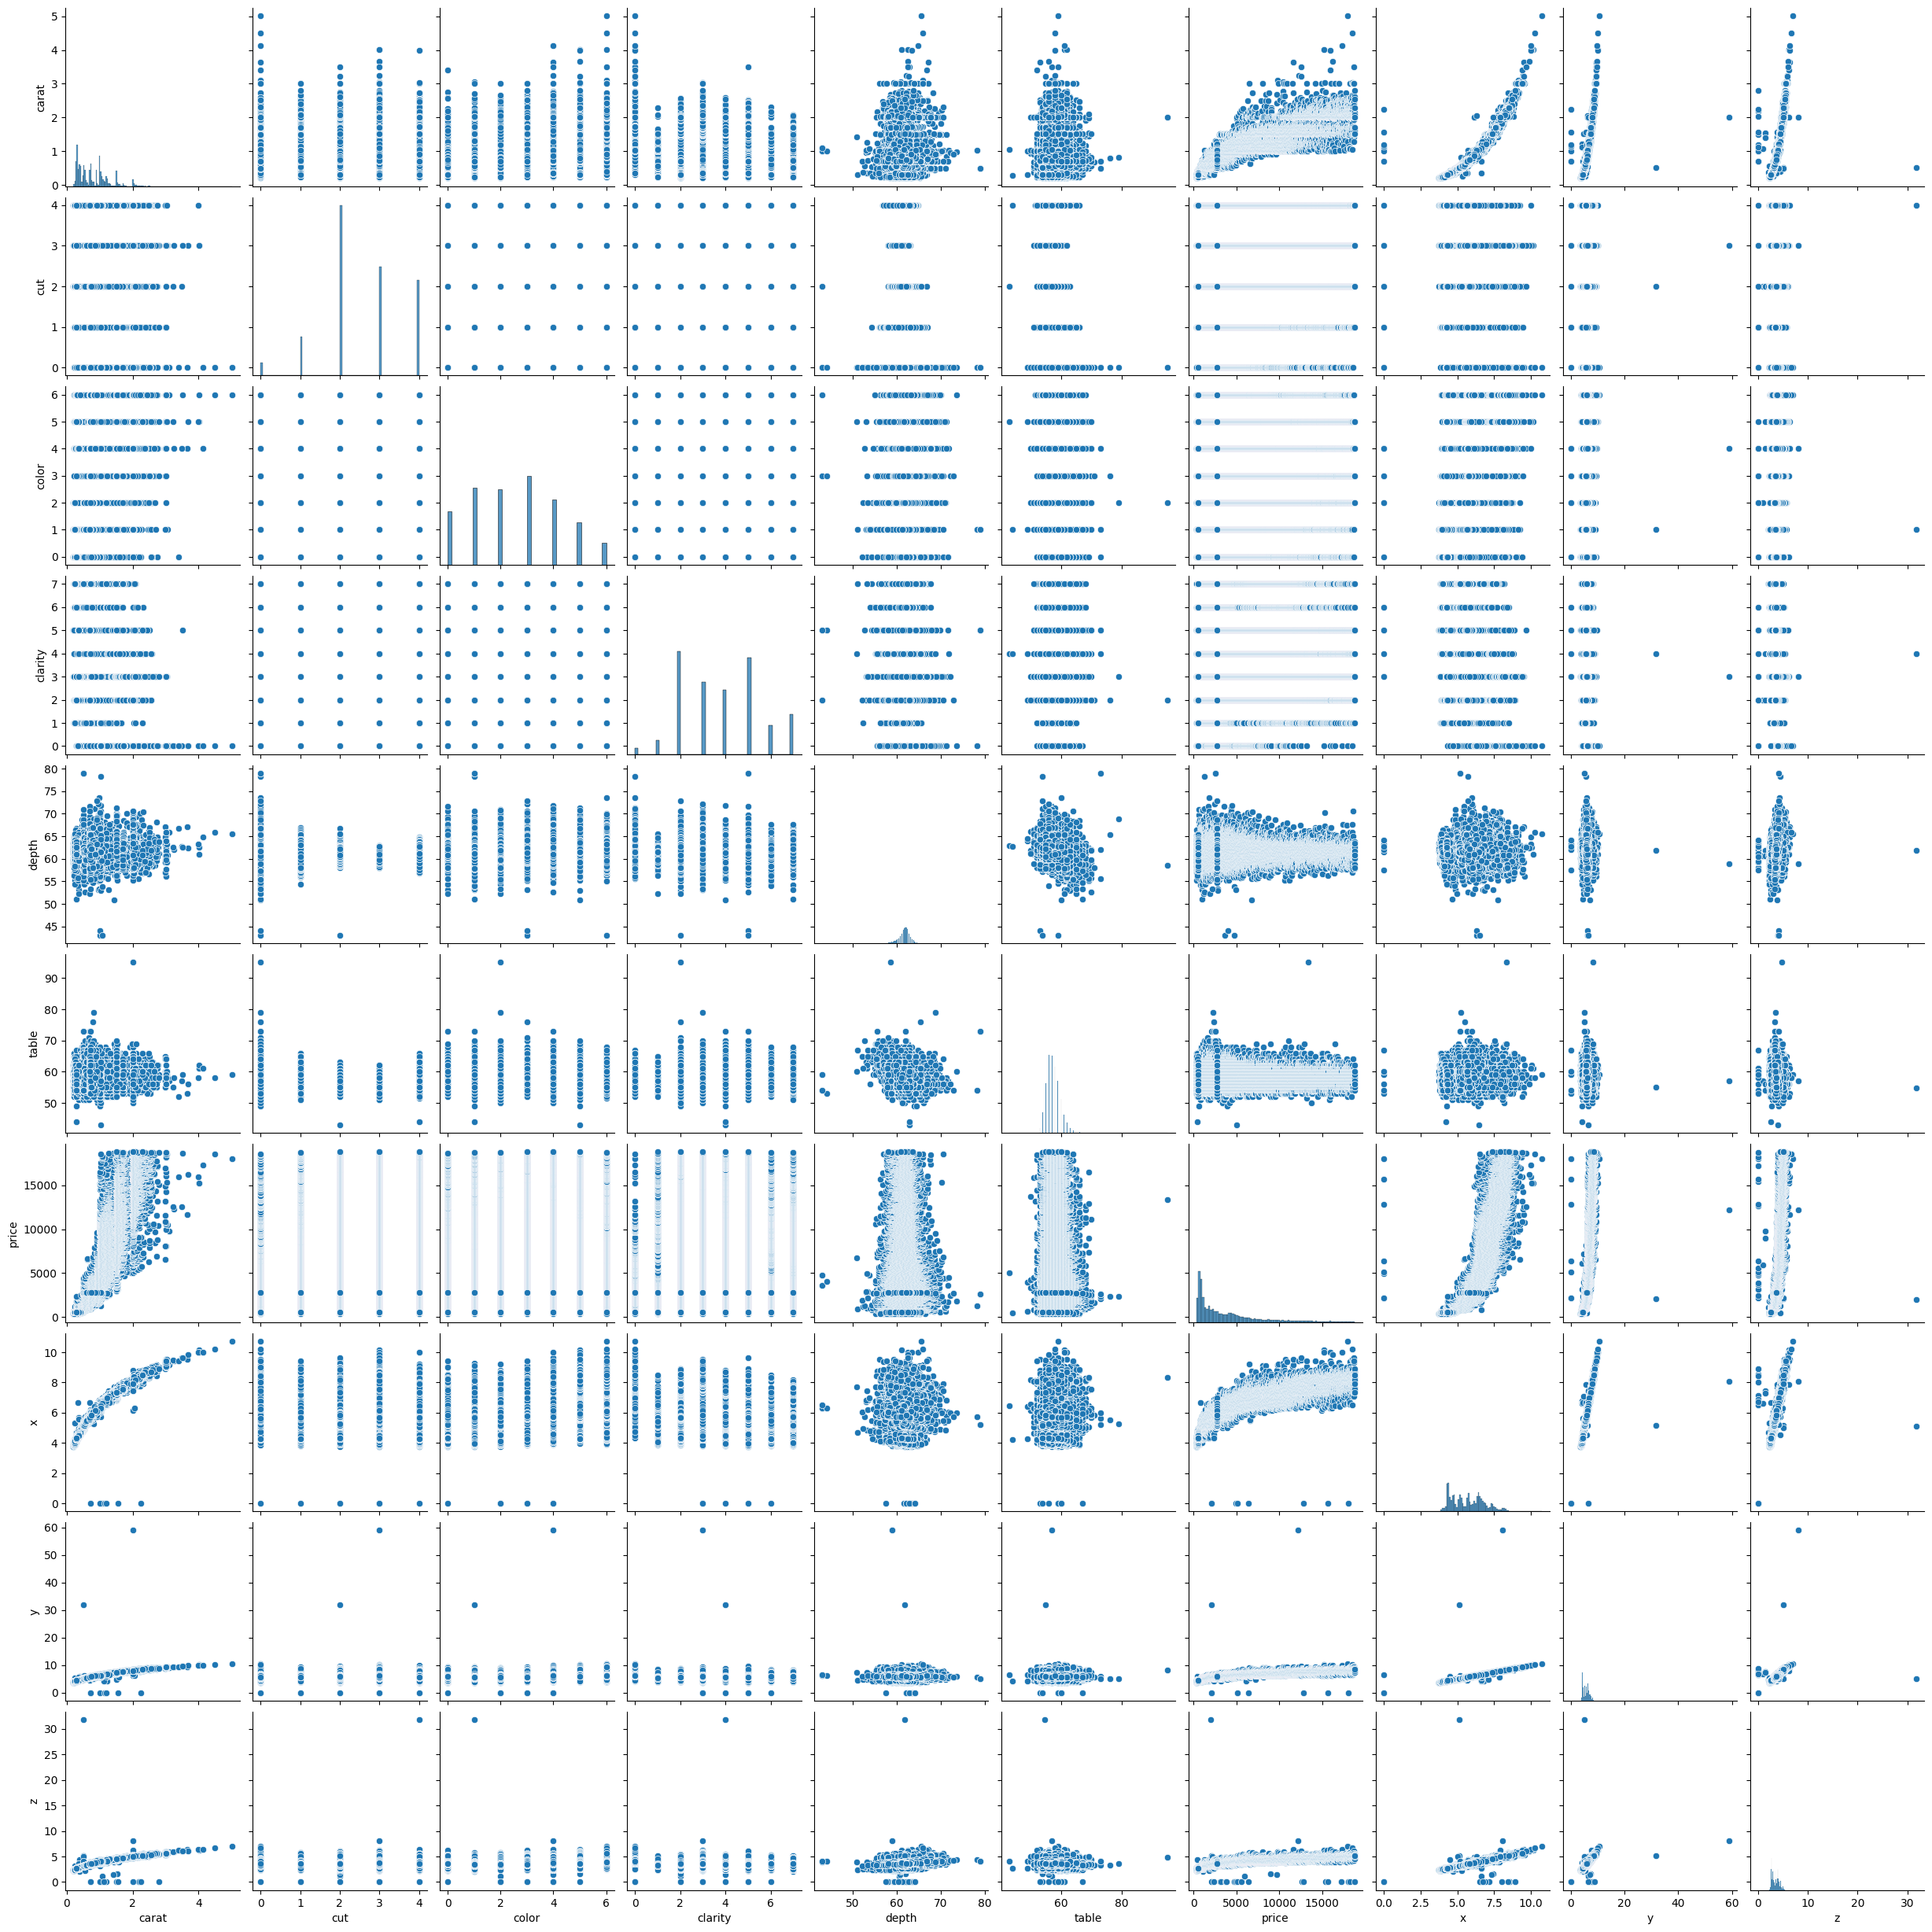

In [20]:
sns.pairplot(df);

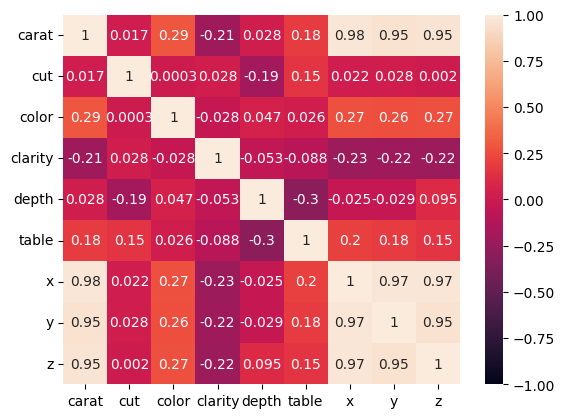

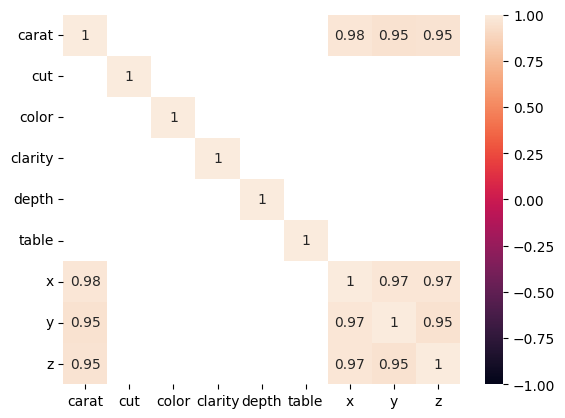

In [21]:
correlation_df = df[feature_names].corr()
sns.heatmap(correlation_df, vmin=-1, vmax=1, annot=True)
plt.figure()
sns.heatmap(correlation_df[np.abs(correlation_df) > 0.75], vmin=-1, vmax=1, annot=True);

Теперь мы можем использовать данные для обучения модели линейной регрессии

In [22]:
X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()

model_md = LinearRegression()
model_md.fit(X, y)

mse_md = mean_squared_error(model_md.predict(X), y)
print(f"Multi-dimensional approximation MSE: {mse_md:1.3f}")

Multi-dimensional approximation MSE: 1829128.158


При обучении на полном наборе данных сложно сделать выводы о качестве модели. Чаще всего прибегают к приему разделения набора данных на *тренировочный* и *тестовый* наборы (и реже всего появляется *валидационный* набор)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_md = LinearRegression()
model_md.fit(X_train, y_train)

mse_md = mean_squared_error(model_md.predict(X_test), y_test)
print(f"Multi-dimensional approximation MSE: {mse_md:1.3f}")

Multi-dimensional approximation MSE: 1750176.393


Среди данных могли попастся дубликаты строк.

**Упражнение 6**. Попробуйте проверить набор данных на уникальность значений. Если обнаружаться одинаковые строки, то удалите их из набора данных `df` с помощью метода `.drop_duplicates()`. Обучите модель линейной регрессии на отфильтрованных данных

In [23]:
df.shape, df.drop_duplicates().shape

((53940, 10), (53794, 10))

In [24]:
df_unique =  df.drop_duplicates()
X = df_unique[feature_names].to_numpy()
y = df_unique[target_name].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_md = LinearRegression()
model_md.fit(X_train, y_train)

mse_md = mean_squared_error(model_md.predict(X_test), y_test)
print(f"Multi-dimensional approximation MSE: {mse_md:1.3f}")

Multi-dimensional approximation MSE: 1765296.815


Мы провалидировали модель лишь на определенном наборе данных. Можно задаться вопросом: если тренировочный и тестовый наборы будут выбираться каждый раз новыми, то какие значения функции потерь будут получаться? Сравнимы ли эти значения с предыдущими?
Для более достоверной оценки качества модели используется кросс-валидация, при которой сначала выполняем разделение на обучающую и тестовую выборки. Далее обучающую часть выборки делим на k примерно (в случае если на число объектов не делится нецело на k) равных частей (это будет k-fold кросс-валидация). На первой итерации обучаем на 1-4 частях данных, и на 5-й оцениваем качество модели. На следующей итерации обучаем модель на 1-3 и 5-й частях данных и на 4-й части тестируем модель и т. д. В итоге каждый объект из обучающей части выборки участвует как в обучении, так и в тестировании модели. С помощью кросс-валидации часто подбирают гиперпаметры моделей. На тестовой же части выборки выполняют финальную оценку качества построенных моделей и их сравнение.

[Читать продолжение в источнике...](https://matematika.org/schools/deep-learning-school/semestr1/advanced/)

Воспользуемся методикой кросс-валидации:

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=None, shuffle=True)

model_cv = LinearRegression()
X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()

cv_res = cross_validate(
    model_cv,
    X,
    y,
    scoring='neg_mean_squared_error',
    cv=kf,
)

print(f"Test mse errors are {cv_res['test_score']}")
print(f"Mean test mse = {cv_res['test_score'].mean()}")

Test mse errors are [-1840553.94734525 -2342294.62870105 -1918046.54082893 -1819337.8054112
 -1745795.36218229]
Mean test mse = -1933205.6568937427


## Метод K-ближайших соседей в задаче регрессии

Рассмотрим модель K-ближайших соседей (K-nearest neighbors KNN). Интуитивное понимание модели — для выбранного набора данных можно вычислить расстояние между точками. Принадлежность точки к определенному классу определяется большинством соседей этой точки.

Метод kNN можно использовать для решения задач регрессии. Алгоритм определяет значение целевого параметра по значениям среднему значению ближайших соседей.

In [25]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5, metric="minkowski")

Попробуем обучить модель на имеющихся данных

In [26]:
X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_knn.fit(X_train, y_train)

mse_knn = mean_squared_error(model_knn.predict(X_test), y_test)

print(f"KNN model MSE: {mse_knn:1.3f}")

KNN model MSE: 827846.932


Optimal number of neighbors: 5


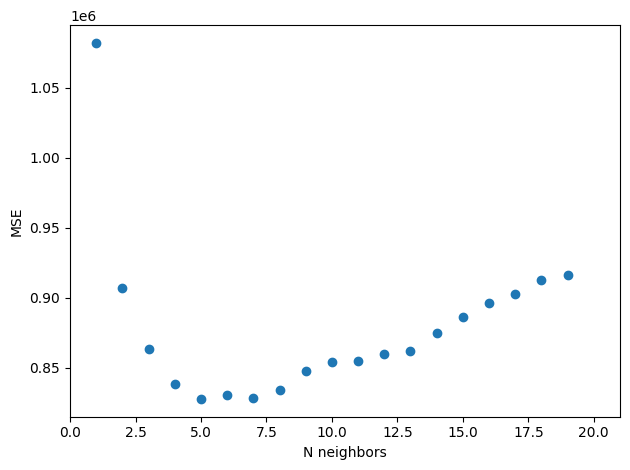

In [27]:
mse_knn = []
for n_neighbors in range(1, 20):
    model_knn = KNeighborsRegressor(n_neighbors=n_neighbors, metric="euclidean")
    model_knn.fit(X_train, y_train)

    mse_knn.append(mean_squared_error(model_knn.predict(X_test), y_test))

mse_knn = np.array(mse_knn)
plt.scatter(range(1, 20), mse_knn)
plt.xlim((0, 21))
plt.xlabel("N neighbors")
plt.ylabel("MSE")
plt.tight_layout()

print(f"Optimal number of neighbors: {mse_knn.argmin() + 1}")

Оптимальное количество соседей — 5

## Дерево решений

Дерево решений использовалось для рещения задачи классификации в предыдущей лабораторной работе. В этот раз попробуем рассмотреть работу дерева решений для задач регрессии.

Деревья могут использоваться и в задаче регрессии. В таком случае они подгоняют искомую зависимость кусочно-константной функцией.

![image]( 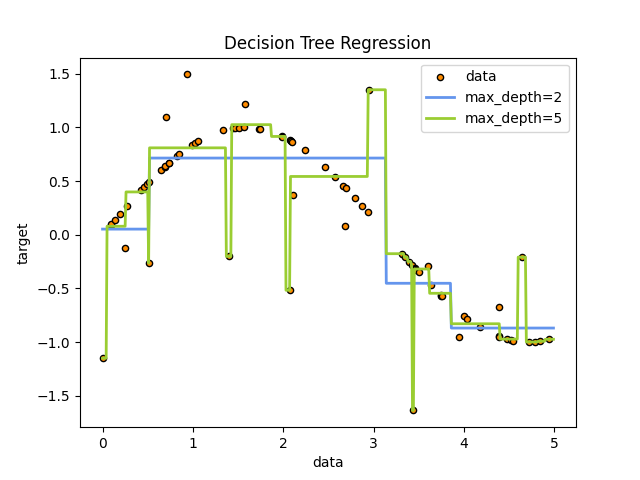)

In [28]:
from sklearn import tree

model_tree = tree.DecisionTreeRegressor(random_state=1, max_depth=3, criterion="squared_error")

Обучим дерево на всех возможных признаках

In [29]:
X = df[feature_names].to_numpy()
y = df[target_name].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_tree.fit(X_train, y_train)

y_pred = model_tree.predict(X_test)

mean_squared_error(y_test, y_pred)

np.float64(1817470.888303215)

Дерево решений показывает значительно меньшее значение MSE. Подумайте как это объяснить.

Попробуем визуализировать дерево в текстовом формате

In [30]:
print(tree.export_text(model_tree))

|--- feature_0 <= 1.00
|   |--- feature_7 <= 5.53
|   |   |--- feature_7 <= 4.99
|   |   |   |--- value: [788.69]
|   |   |--- feature_7 >  4.99
|   |   |   |--- value: [1695.89]
|   |--- feature_7 >  5.53
|   |   |--- feature_0 <= 0.89
|   |   |   |--- value: [2726.66]
|   |   |--- feature_0 >  0.89
|   |   |   |--- value: [3961.79]
|--- feature_0 >  1.00
|   |--- feature_7 <= 7.19
|   |   |--- feature_3 <= 3.50
|   |   |   |--- value: [5149.85]
|   |   |--- feature_3 >  3.50
|   |   |   |--- value: [7467.35]
|   |--- feature_7 >  7.19
|   |   |--- feature_7 <= 7.86
|   |   |   |--- value: [10937.97]
|   |   |--- feature_7 >  7.86
|   |   |   |--- value: [14914.64]



Деревья решений можно визуализировать в графическом формате

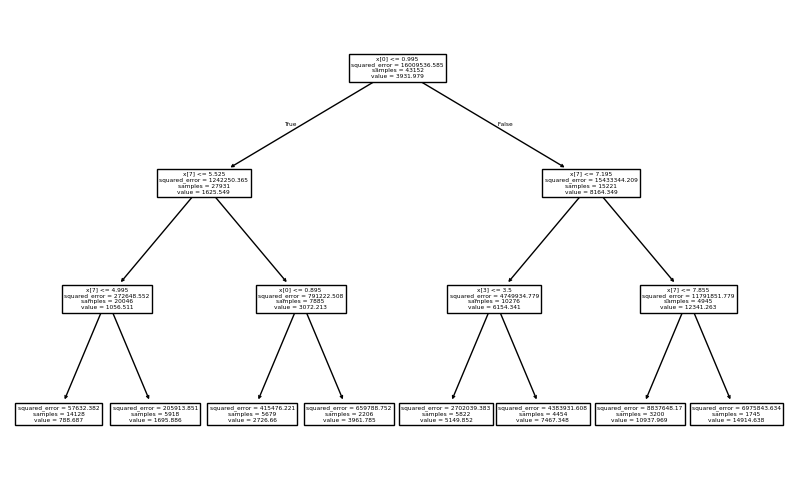

In [31]:
plt.figure(figsize=(10, 6))
tree.plot_tree(model_tree);

Рассмотрим влияние глубины дерева на значение MSE

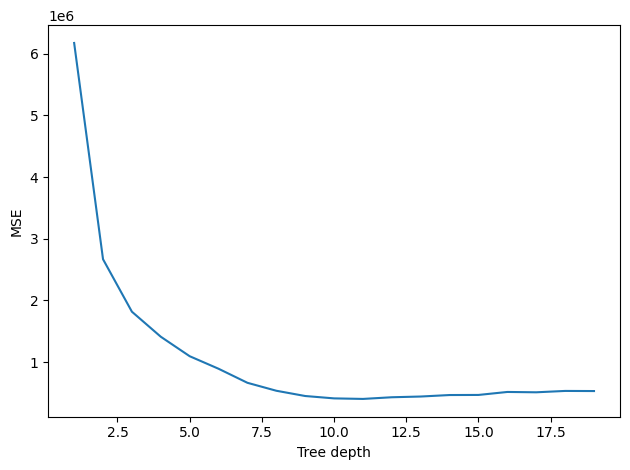

In [32]:
mses = []
for depth in range(1, 20):
    model_tree = tree.DecisionTreeRegressor(random_state=1, max_depth=depth, criterion="squared_error")
    X = df[feature_names].to_numpy()
    y = df[target_name].to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))

plt.plot(range(1, 20), mses)
plt.xlabel("Tree depth")
plt.ylabel("MSE")
plt.tight_layout()

Изучим в разрезе (признак, целевой признак) влияние глубины дерева на псевдоданных

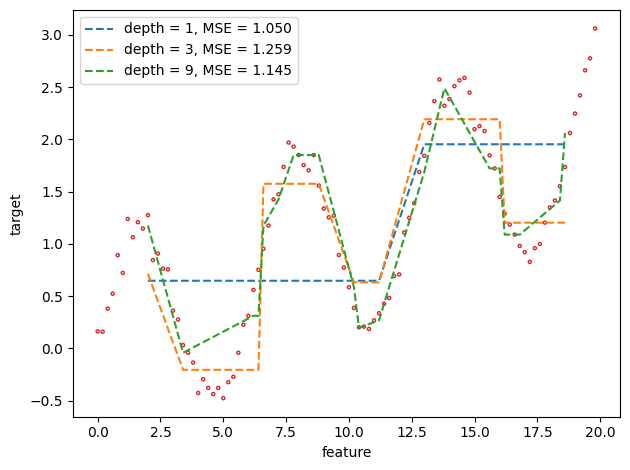

In [33]:
n_samples = 100
np.random.seed(1)

X = np.linspace(0, 20, n_samples, endpoint=False).reshape((-1, 1))
y = np.sin(X) + 0.01 * X + 0.1 * np.random.normal(X)
y = y.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

plt.scatter(X, y, color="C3", facecolor="none", s=5)
plt.ylabel("target")
plt.xlabel("feature")

for depth in (1, 3, 9):
    model_tree = tree.DecisionTreeRegressor(max_depth=depth, random_state=1)
    model_tree.fit(X_train, y_train)
    y_pred = model_tree.predict(sorted(X_test))
    plt.plot(sorted(X_test), y_pred, label=f"depth = {depth}, MSE = {mean_squared_error(y_test, y_pred):1.3f}", linestyle="--")

plt.legend()
plt.tight_layout()

Глубиной дерева можно определить точность апроксимации искомой функции

## Логистическая регресссия

Модель логистичкеской регрессии применима для задач описания зависимости бинарной метки от набора параметров. Задача очень похожа на задачу классификации, но использует иной подход к решению данного вопроса.

### Постановка задачи

Пускай есть набор признаков и некоторая бинарная целевая метрика. Требуется определить **вероятность** принадлежности к одному из классво по набору параметров.

Можно поступить как в случае линейной регрессии: целевая метрика описывается линейным набором признаков, а ответ получается по знаку ответа линейной модели. Если говорить формулами, то
$$ y_i = \text{sign}\left(w_0 - \sum\limits_{i=1}^{M} w_{i} x_i\right) = w^{T} x. $$
Положительный знак отвечает одному классу объектов, а отрицательный знак отвечает другому классу.

Знаковая функция представляет ступеньку. Такую ступеньку нельзя дифференцировать и хотелось бы сгладить переход от одного ответа к другому. Одной из подходящих функцией является сигмоидная
$$ \sigma(t) = \frac{1}{1 + e^{-t}}. $$
Здесь аргументом функции выступает вышеопределенная линейная модель.

Для тренировки модели требуется определить функцию потерь. Для логистической модели это **логистическая функция потерь**
$$ Q(w) = \sum\limits_{i = 1}^{N}\log\left(1 + \exp(y_i w^Tx)\right) \rightarrow \min. $$
Вывод данной функции потерь основывается на вероятностном подходе. Не будем нагружать выкладками данную лабораторную работу.

### Пример использования

Разберемся с логистической регрессией на примере предсказания вида пингвина по его размерам. Загрузим соответствующий набор данных.

In [34]:
df = sns.load_dataset("penguins")

feature_names = df.columns[1:]
target_name = df.columns[0]

print(df[target_name].unique())

df.head()

['Adelie' 'Chinstrap' 'Gentoo']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Изобразим распределение признаков

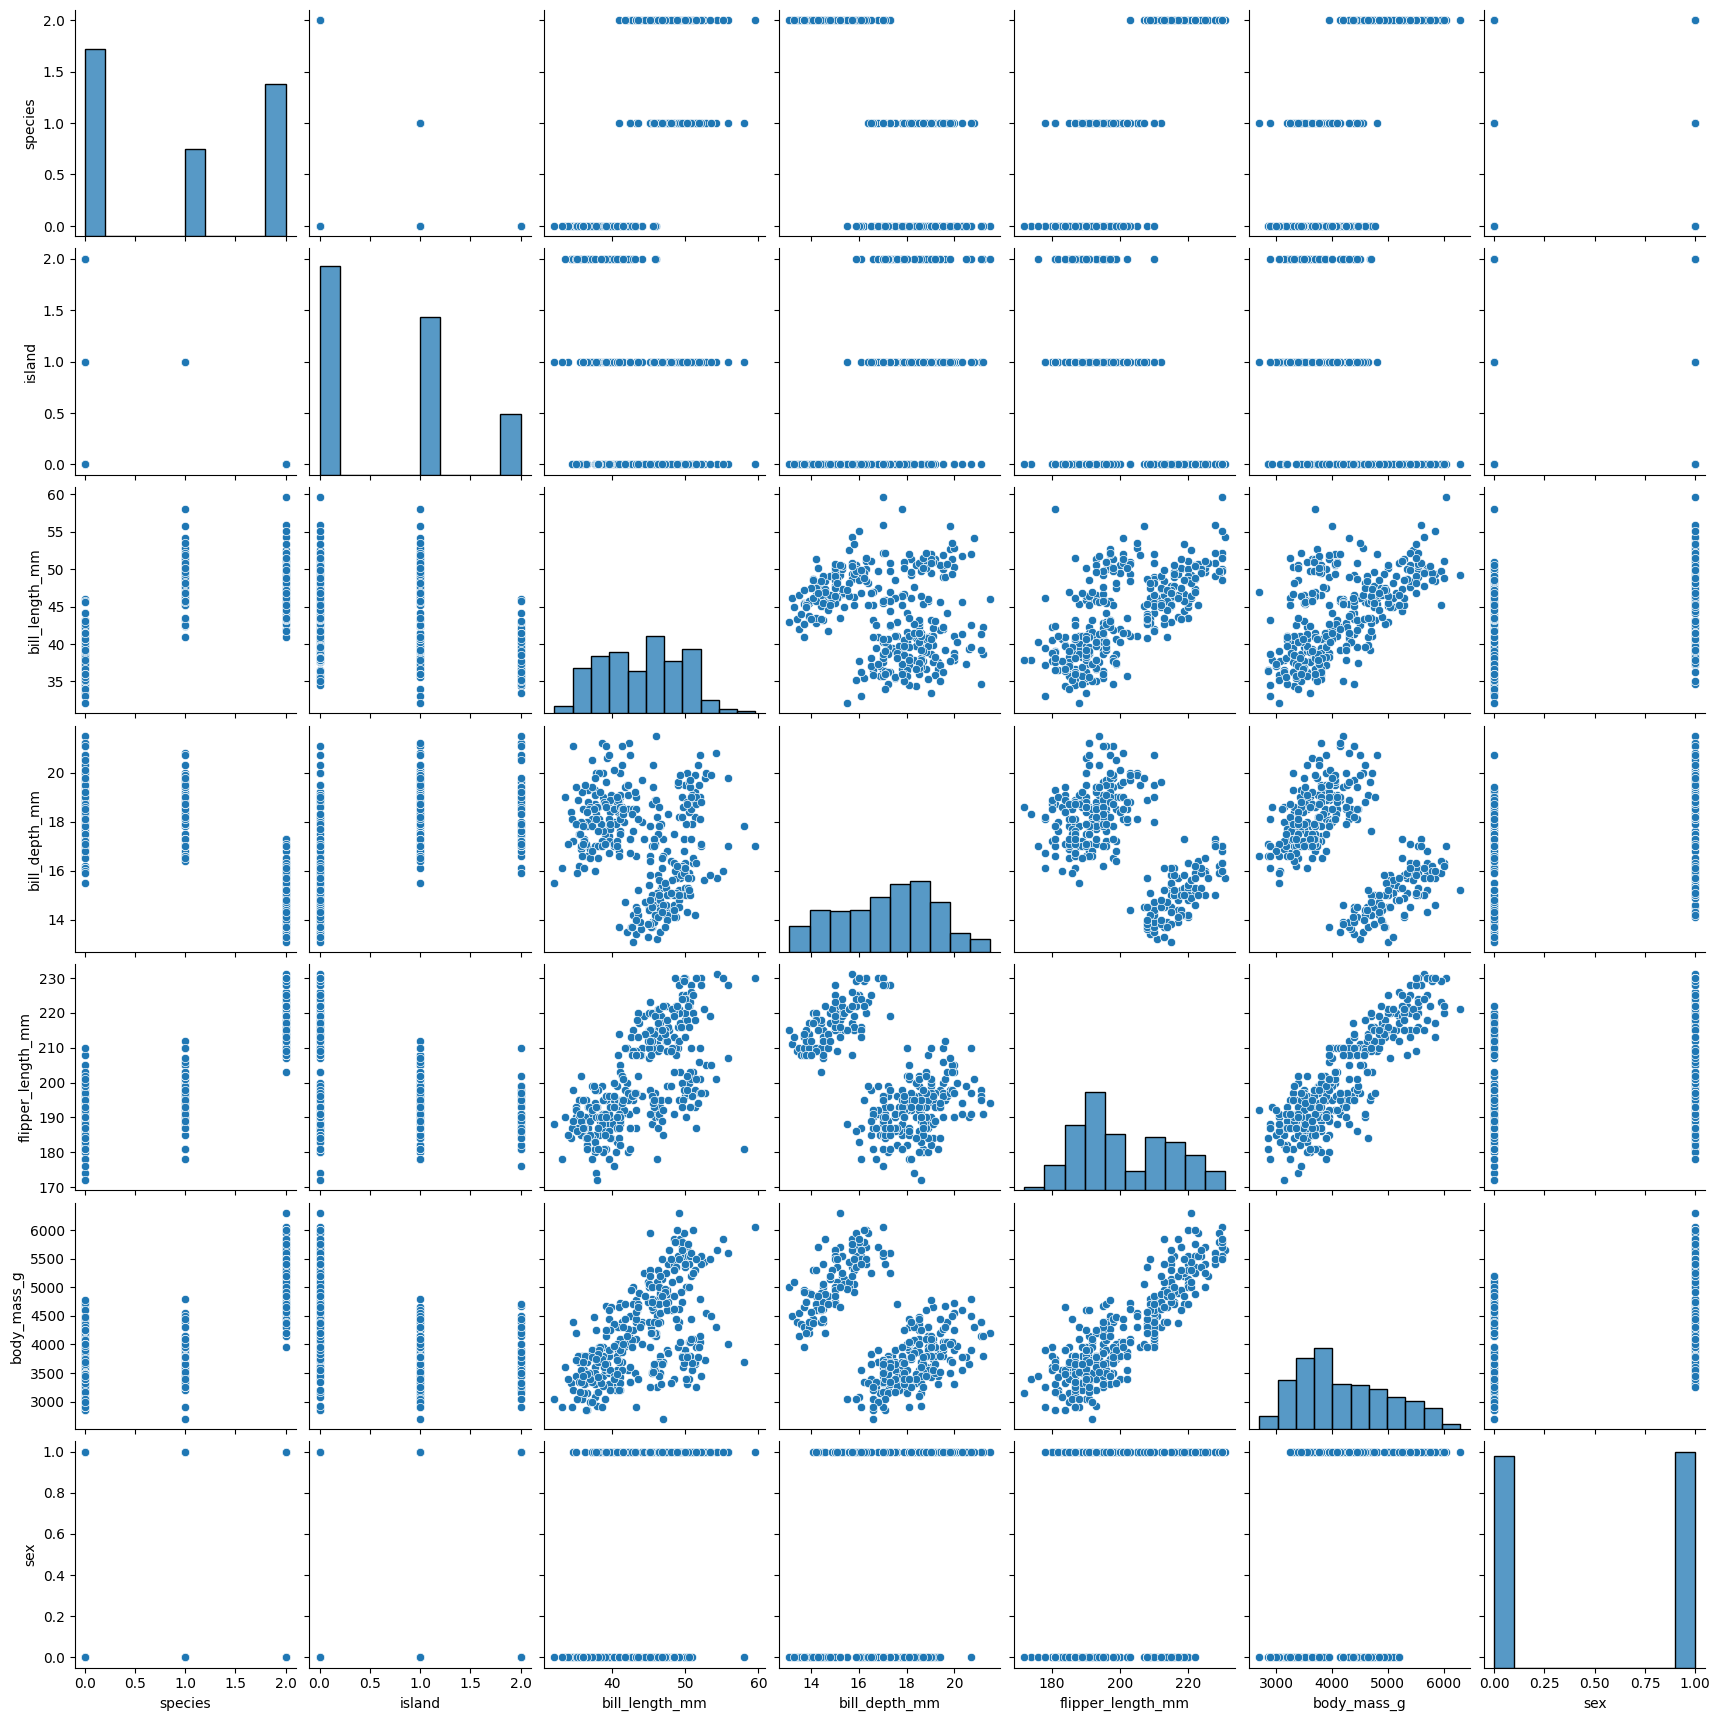

In [46]:
sns.pairplot(df);

Переведем категориальные признаки в числовые. Это будет так называемое порядковое кодирование.

In [47]:
encoder = LabelEncoder()

for column in df.select_dtypes(["category", "object"]):
    df[column] = encoder.fit_transform(df[column])

Помимо порядкового кодирования, есть one-Hot Encoding при котором создаются новые столбцы. Число новых столбцов равно  числу уникальных значений признака. Заполнение столбцов происходит следующим образом:

*   1 - для текущего объекта значение кодируемого признака равно категории этого признака для которой создан данный столбец.
*   0 - для текущего объекта значение кодируемого признака **НЕ** равно категории этого признака для которой создан данный столбец.
 Выполнить такое кодирование можно с помощью [OneHotEncoder](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

**Упражнение 7**. Сформируйте данные признаков в матрицу и значение целевого признака в столбец. При этом целевой признак должен выделять пингвинов вида `Chinstrap` среди всех остальных (должен состоять из 0 и 1).

*Учтите*: признаки были приведены к числовым

In [48]:
print(f"Shape before dropna: {df.shape}")
df = df.dropna()
print(f"Shape after dropna: {df.shape}")

X = df[feature_names].to_numpy()
y = (df[target_name] == 1).to_numpy()


Shape before dropna: (333, 7)
Shape after dropna: (333, 7)


In [49]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

c:\Users\kleme\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy score: {accuracy}")
print(f"Confussion matrix:\n {matrix}")

Accuracy score: 1.0
Confussion matrix:
 [[50  0]
 [ 0 17]]


Модель получилась достаточно точной. Для ее обучения пришлось откинуть строки, которые не имеют значения в каких-то признаках.

Посмотрим на Receiver Operating Characteristic (ROC)-кривую модели, которая показывает зависимость чувствительности алгоритма классификации (чувствительность отражает долю положительных результатов, которые правильно идентифицированы как таковые) от его специфичности (доли отрицательных результатов, которые правильно идентифицированы как таковые) при варьировании порога решающего правила.

ROC-кривая позволяет оценить качество бинарной классификации:
- по оси абсцисс откладывается False Positive Rate (доля отрицательных объектов, которые были классифицированы как положительные).
- по оси ординат True Positive Rate (доля положительных объектов, которые были определены как положительные).

AUC ROC (площадь под ROC-кривой) равен доле пар объектов вида (объект класса 1, объект класса 0), которые алгоритм верно упорядочил.

Баланс между FPR и TPR является одной из основных проблем. Ошибка определения отрицательного объекта за положительной может иметь больую цену (пропуск письма из Хогвартса на почте), но и ошибка неопределения положительного объекта за положительный может быть критической (определение серьезных недугов).

Про алгоритм построения ROC-кривой дополнительно можно [прочитать в источнике...](https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA)

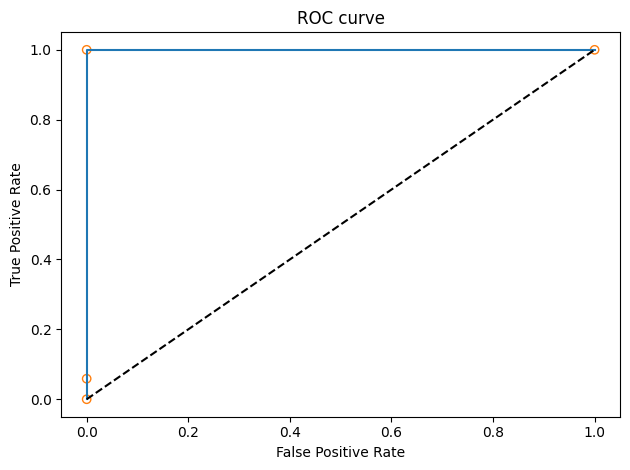

In [51]:
from sklearn.metrics import roc_curve

fpr, tpr, treshold = roc_curve(y_true=y_test, y_score=model_logreg.predict_proba(X_test)[:, 1])

plt.scatter(fpr, tpr, facecolors="none", edgecolors="C1")
plt.step(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.tight_layout()

### Нормирование данных

Благодаря нормированию данных можно привести влияние признаков на одинаковый масштаб.

Для того, чтобы не было утечки признаков обучать модель для масштабировния надо на обучающей выборке, и проводить с найденными параметрами масштабирование валидационной (если есть) и тестовой выборок. Другими словами, на обучающей выборке используем методы `.fit()`, а потом `.transform()` или просто `.fit_transform()`, а на валидационной и тестовой только метод `.transform()`.

**Упражнение 8**. Попробуйте нормализовать данные для обучения и проверьте качество модели на нормированных данных

Accuracy score: 0.9850746268656716
Confussion matrix:
 [[50  0]
 [ 1 16]]


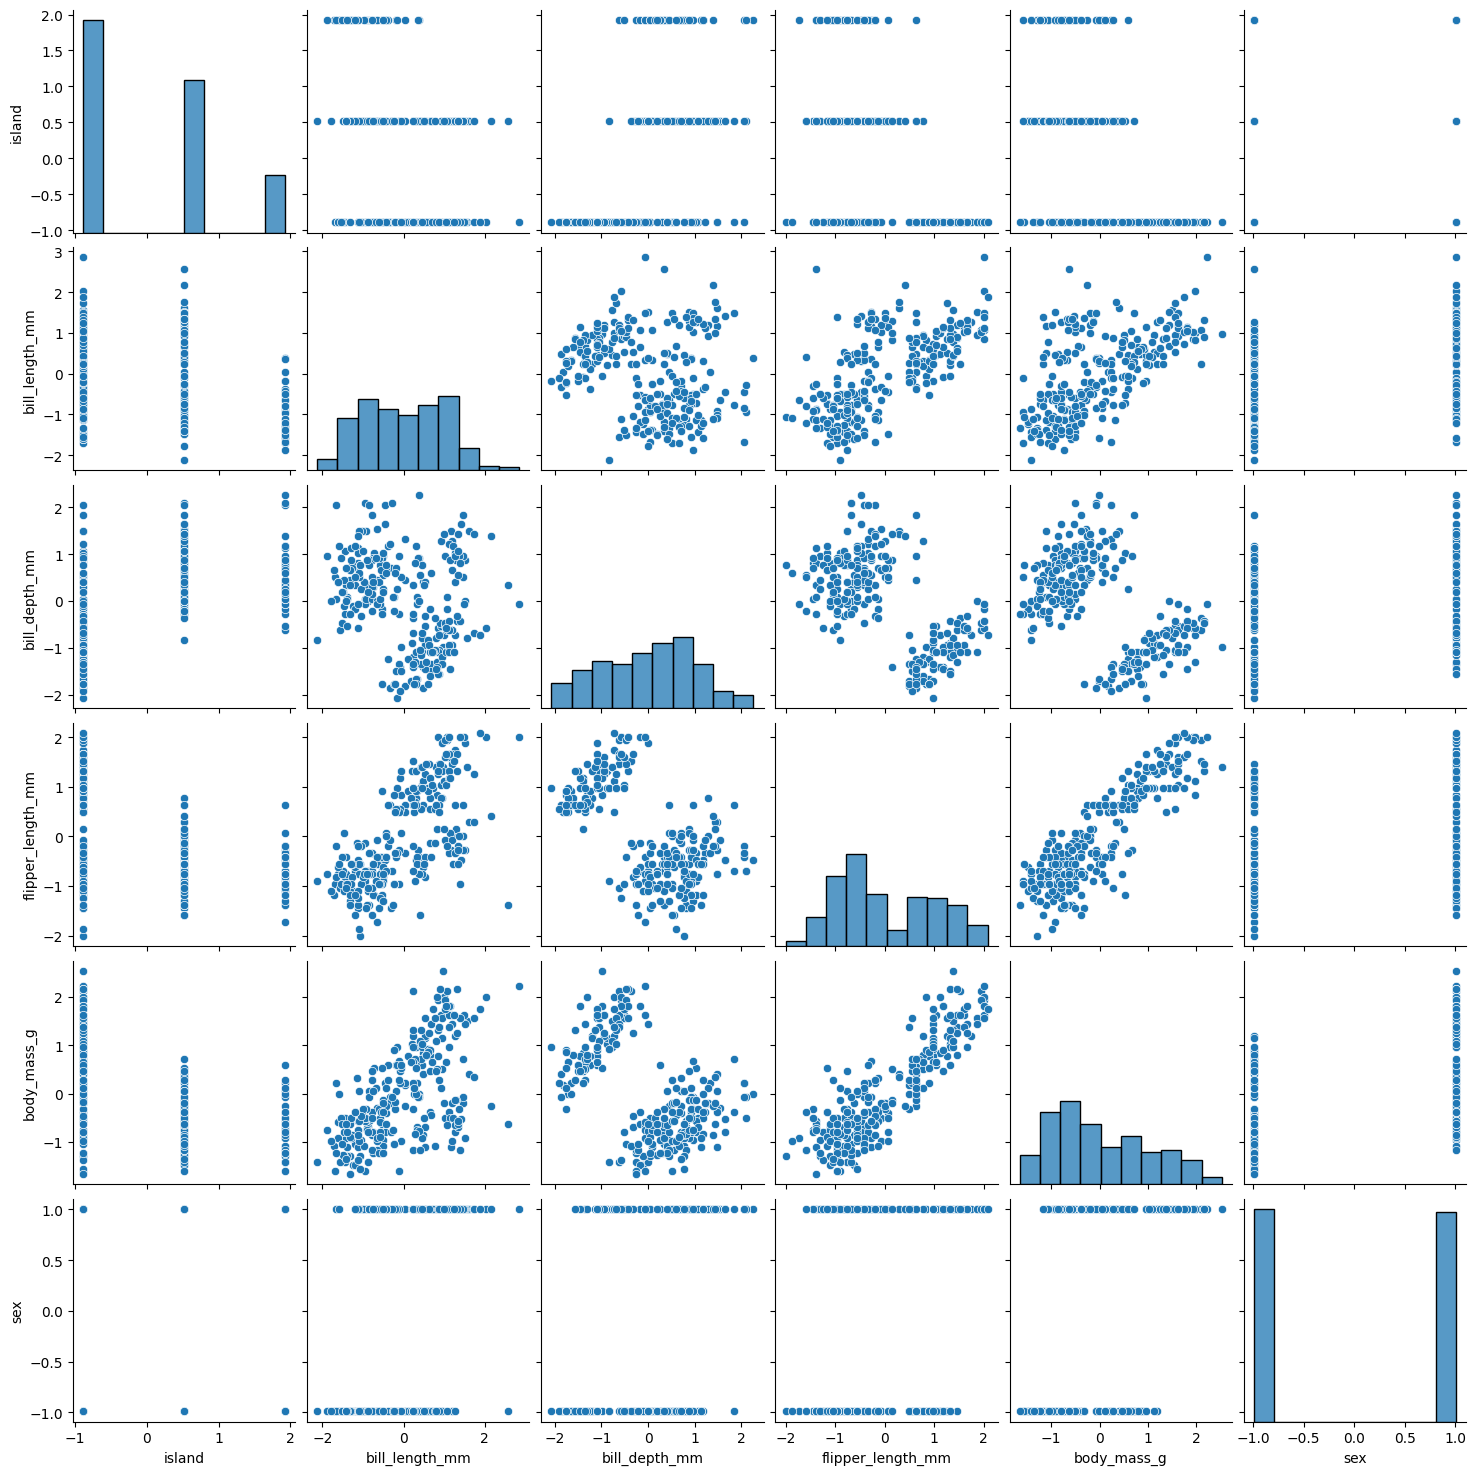

In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_transformed = scaler.fit_transform(X_train, y_train)

sns.pairplot(pd.DataFrame(X_transformed, columns=feature_names))

model_logreg = LogisticRegression()

X_test = scaler.transform(X_test)
model_logreg.fit(X_transformed, y_train)
y_pred = model_logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy score: {accuracy}")
print(f"Confussion matrix:\n {matrix}")

**Упражнение 9**. Попробуйте построить ROC-кривую для модели из предыдущего упражнения

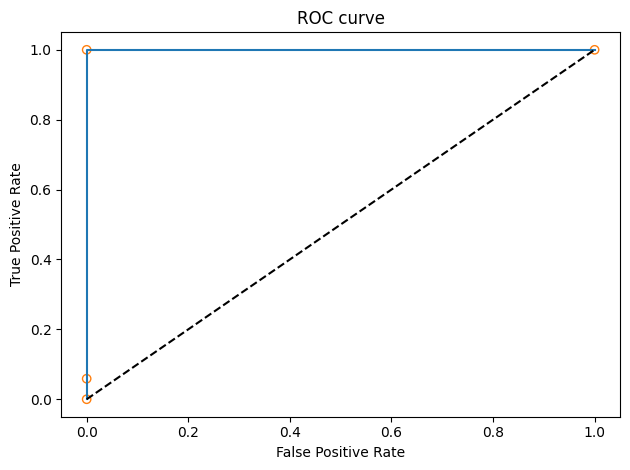

In [53]:
fpr, tpr, treshold = roc_curve(y_true=y_test, y_score=model_logreg.predict_proba(X_test)[:, 1])

plt.scatter(fpr, tpr, facecolors="none", edgecolors="C1")
plt.step(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.tight_layout()

**Задание 1**. В качестве задачи на регрессию возьмем классический набор данных по диабету. Вам предоставляется информация о пациентах
- Проанализируйте влияние параметров на уровень болезни
- Попробуйте воспользоваться алгоритмом линейной регрессии для одного из признаков
- Попробуйте воспользоваться алгоритмом линейной регрессии для всех признаков одновременно

In [54]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes(as_frame=True)
df = dataset.frame

print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [55]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


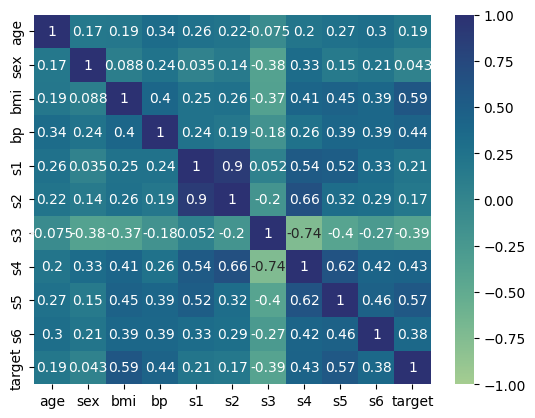

In [56]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest");

# С target нормально коррелирует bmi, bp, s3, s4, s5

Model fit values: w_0 = 151.668, w_1 = 977.740
Mean squared error for feature "bmi": 3989.8289727609313


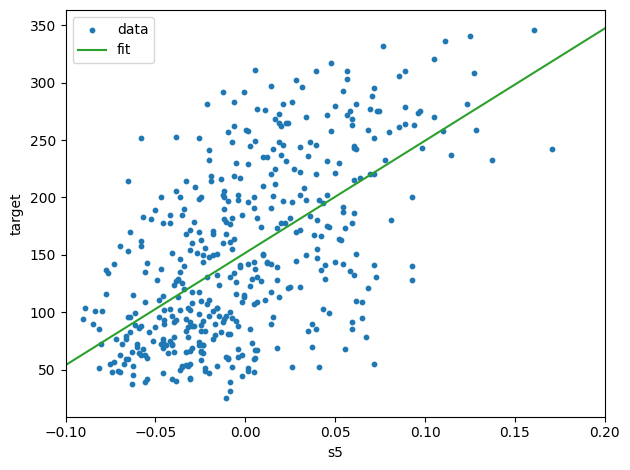

In [57]:
model1_1 = LinearRegression()
X = df["bmi"]
y = df["target"]
X = X.to_numpy().reshape((-1, 1)) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model1_1.fit(X_train, y_train)
w_0, w_1 = (model1_1.intercept_, *model1_1.coef_)
print(f"Model fit values: w_0 = {w_0:1.3f}, w_1 = {w_1:1.3f}")
print(f"Mean squared error for feature \"bmi\": {mean_squared_error(y_test, model1_1.predict(X_test))}")
x_plot = np.array([-0.1, 0.2])
plt.scatter(df["bmi"], y, s=10, label="data")
plt.plot(x_plot, w_0 + w_1 * x_plot, label="fit", color="C2")
plt.xlim(-0.1, 0.2)
plt.xlabel("s5")
plt.ylabel("target")
plt.legend()
plt.tight_layout()

In [58]:
model1_2 = LinearRegression()
X = df.drop(columns=["target"])
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model1_2.fit(X_train, y_train)
print(f"Mean squared error for all features: {mean_squared_error(y_test, model1_2.predict(X_test))}")

Mean squared error for all features: 2992.5812293010163


**Задание 2**. В качестве задачи на линейную регрессию возьмем классический набор данных Титаника. Вам предоставляется информация о пассажирах затонувшего лайнера. Попробуйте определить влияние параметров на целевую метрику "survived".
- Определите наиболее влияющие параметры
- Попробуйте воспользоваться алгоритмом логистической регрессии
- Преобразуйте параметры к виду стандартного распределения и обучите линейную регрессию снова, сравните с предыдущей моделью
- Постройте ROC-кривую для модели

In [59]:
df = sns.load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df = df.drop(columns=["class", "embark_town", "who", "adult_male", "alive", "alone", "deck"], errors="ignore")
for i in df.select_dtypes(exclude="number"):
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


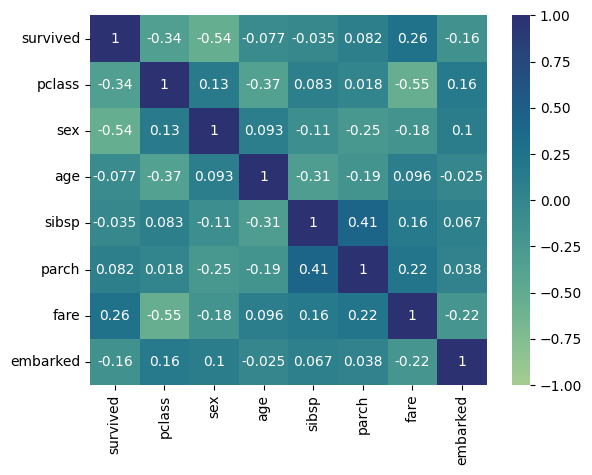

In [61]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="crest");

# С target нормально коррелируют sex и pclass. age логично добавить к sex

In [62]:
df["age"] = df["age"].fillna(df["age"].mean())
X = df[["pclass", "sex", "age"]]
y = df["survived"]
model2_1= LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model2_1.fit(X_train, y_train)
print(f"Accuracy with unscaled features: {accuracy_score(y_test, model2_1.predict(X_test))}")

Accuracy with unscaled features: 0.8100558659217877


In [63]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_transformed = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)
model2_2= LogisticRegression()
model2_2.fit(X_transformed, y_train)
print(f"Accuracy with scaled features: {accuracy_score(y_test, model2_2.predict(X_test))}")

Accuracy with scaled features: 0.8100558659217877


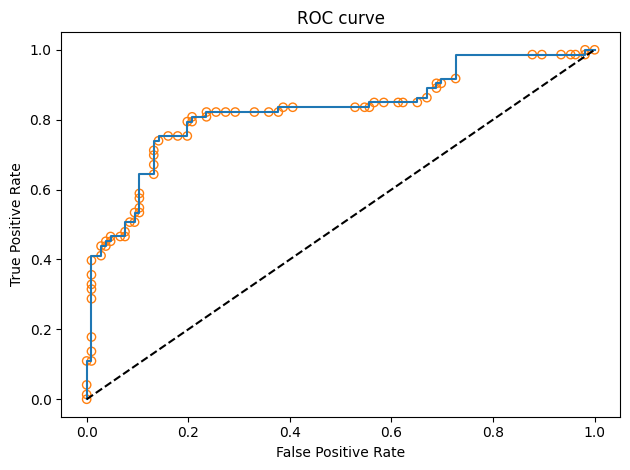

In [64]:
fpr, tpr, treshold = roc_curve(y_true=y_test, y_score=model2_2.predict_proba(X_test)[:, 1])

plt.scatter(fpr, tpr, facecolors="none", edgecolors="C1")
plt.step(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.tight_layout()